In [1]:
import welly
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

# Meassurement While Drilling "MWD" Data Analysis
## `.xml` interpretation

In [2]:
w_info =r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Drilling\Norway-StatoilHydro-15_$47$_9-F-10\1\log\1\1\1\00001.xml"
with open(w_info) as f:
    data = f.read()
data_xml = BeautifulSoup(data, 'xml')
print("Nodes on xml file:\n",set([str(tag.name) for tag in data_xml.find_all()]))

Nodes on xml file:
 {'runNumber', 'logCurveInfo', 'unit', 'indexCurve', 'nameWellbore', 'commonData', 'direction', 'typeLogData', 'dTimLastChange', 'logData', 'mnemonic', 'priv_userOwner', 'dTimCreation', 'priv_dTimPriority', 'dataSource', 'startIndex', 'maxIndex', 'mnemonicList', 'unitList', 'log', 'data', 'logs', 'name', 'curveDescription', 'priv_ipLastChange', 'priv_dTimReceived', 'priv_userLastChange', 'sourceName', 'creationDate', 'pass', 'serviceCompany', 'indexType', 'priv_ipOwner', 'nameWell', 'minIndex', 'endIndex'}


In [3]:
print("Log Curves:\n",data_xml.find_all('mnemonicList')[0].text)

Log Curves:
 DEPTH,GS_G_NC4,GS_MTOA,GS_DRTV,INCL_CONT_RT,SHKRSK_RT,GS_G_IC4,TRPM_RT,PDTF,GS_G_C2,PD_GRAV,AJAM_MWD,GTF_RT,SPM1,GS_G_C1,TVDE,BITRUN,GS_MWTI,ATMP_RT,THKD,HKLI,ARC_GR_RT,TFLO,DVER,APRS_RT,GS_SPPA,GS_TQA,SPM2,P28H_RT,PDSHKRSK,CRPM_RT,GS_DXC,AZIM_CONT_RT,GS_GASA,GS_G_NC5,GS_BDTI,GS_HKLD,GS_TREV,HKLD,SPPA,A28H_RT,PDINCL,GS_TVA,ROP,GS_SWOB,ARC_GR_UNC_RT,P40H_RT,ROP5,GS_DVER,PASS_NAME,RPM,PD_GRAV_BHC,A40H_RT,GS_BDDI,GS_G_C3,SPM3,RGX_RT,GS_ROP,GS_TFLO,HKLO,GS_TDH,SHKPK_RT,TSPM,Stick_RT,BDTI,SHKTOT_RT,GS_RPM,GS_G_IC5,TQA,PMPT,ECD_ARC_RT,DMEA,DEPT,PD_PRDS,GS_MDOA,RHX_RT,SWOB,DRPM


In [4]:
print("Data units:\n", data_xml.find_all('unitList')[0].text)

Data units:
 m,ppm,degC,m,dega,unitless,ppm,rpm,dega,ppm,1/s,unitless,dega,1/min,ppm,m,unitless,g/cm3,degC,kkgf,kkgf,gAPI,L/min,m,kPa,kPa,kN.m,1/min,ohm.m,unitless,rpm,unitless,dega,%,ppm,h,kkgf,unitless,kkgf,kPa,ohm.m,dega,m3,m/h,kkgf,gAPI,ohm.m,m/h,m,unitless,rpm,gAPI,ohm.m,m,ppm,1/min,unitless,m/h,L/min,kkgf,degC,m/s2,1/min,rpm,h,unitless,rpm,ppm,kN.m,h,g/cm3,m,m,%,g/cm3,unitless,kkgf,rpm


In [5]:
print("# of Columns :",len(data_xml.find_all('data')[0].text.split(',')))

# of Columns : 78


## Dataframe construction

In [26]:
log_names = data_xml.find_all('mnemonicList')
print("log_names type file", type(log_names))

log_names type file <class 'bs4.element.ResultSet'>


In [7]:
unit_names = data_xml.find_all('unitList')

> Header, as the concatenation of `log_names`list and `units` list

In [8]:
header = [i + ' - ' + j for i, j in zip(log_names[0].string.split(","), unit_names[0].string.split(","))] 
data = data_xml.find_all('data')

In [9]:
df = pd.DataFrame(columns=header,data=[row.string.split(',') for row in data])

> `NaN`as blank data 

In [10]:
df = df.replace('', np.NaN)

In [56]:
df.head()
df.tail()

,DEPTH - m,GS_G_NC4 - ppm,GS_MTOA - degC,GS_DRTV - m,INCL_CONT_RT - dega,SHKRSK_RT - unitless,GS_G_IC4 - ppm,TRPM_RT - rpm,PDTF - dega,GS_G_C2 - ppm,...,TQA - kN.m,PMPT - h,ECD_ARC_RT - g/cm3,DMEA - m,DEPT - m,PD_PRDS - %,GS_MDOA - g/cm3,RHX_RT - unitless,SWOB - kkgf,DRPM - rpm
9995,1591.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,1591.812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,1591.818,NaN,NaN,NaN,26.11,0,NaN,3515.63,NaN,NaN,...,10.4804727406017,136.33,1.50142504860766,1591.818,NaN,NaN,NaN,617.5,1.8506568696,159.72
9998,1591.839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,1591.858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.columns

Index(['DEPTH - m', 'GS_G_NC4 - ppm', 'GS_MTOA - degC', 'GS_DRTV - m',
       'INCL_CONT_RT - dega', 'SHKRSK_RT - unitless', 'GS_G_IC4 - ppm',
       'TRPM_RT - rpm', 'PDTF - dega', 'GS_G_C2 - ppm', 'PD_GRAV - 1/s',
       'AJAM_MWD - unitless', 'GTF_RT - dega', 'SPM1 - 1/min', 'GS_G_C1 - ppm',
       'TVDE - m', 'BITRUN - unitless', 'GS_MWTI - g/cm3', 'ATMP_RT - degC',
       'THKD - kkgf', 'HKLI - kkgf', 'ARC_GR_RT - gAPI', 'TFLO - L/min',
       'DVER - m', 'APRS_RT - kPa', 'GS_SPPA - kPa', 'GS_TQA - kN.m',
       'SPM2 - 1/min', 'P28H_RT - ohm.m', 'PDSHKRSK - unitless',
       'CRPM_RT - rpm', 'GS_DXC - unitless', 'AZIM_CONT_RT - dega',
       'GS_GASA - %', 'GS_G_NC5 - ppm', 'GS_BDTI - h', 'GS_HKLD - kkgf',
       'GS_TREV - unitless', 'HKLD - kkgf', 'SPPA - kPa', 'A28H_RT - ohm.m',
       'PDINCL - dega', 'GS_TVA - m3', 'ROP - m/h', 'GS_SWOB - kkgf',
       'ARC_GR_UNC_RT - gAPI', 'P40H_RT - ohm.m', 'ROP5 - m/h', 'GS_DVER - m',
       'PASS_NAME - unitless', 'RPM - rpm', 'PD_GRAV

# Relationship between data 

Wall time: 1min 23s


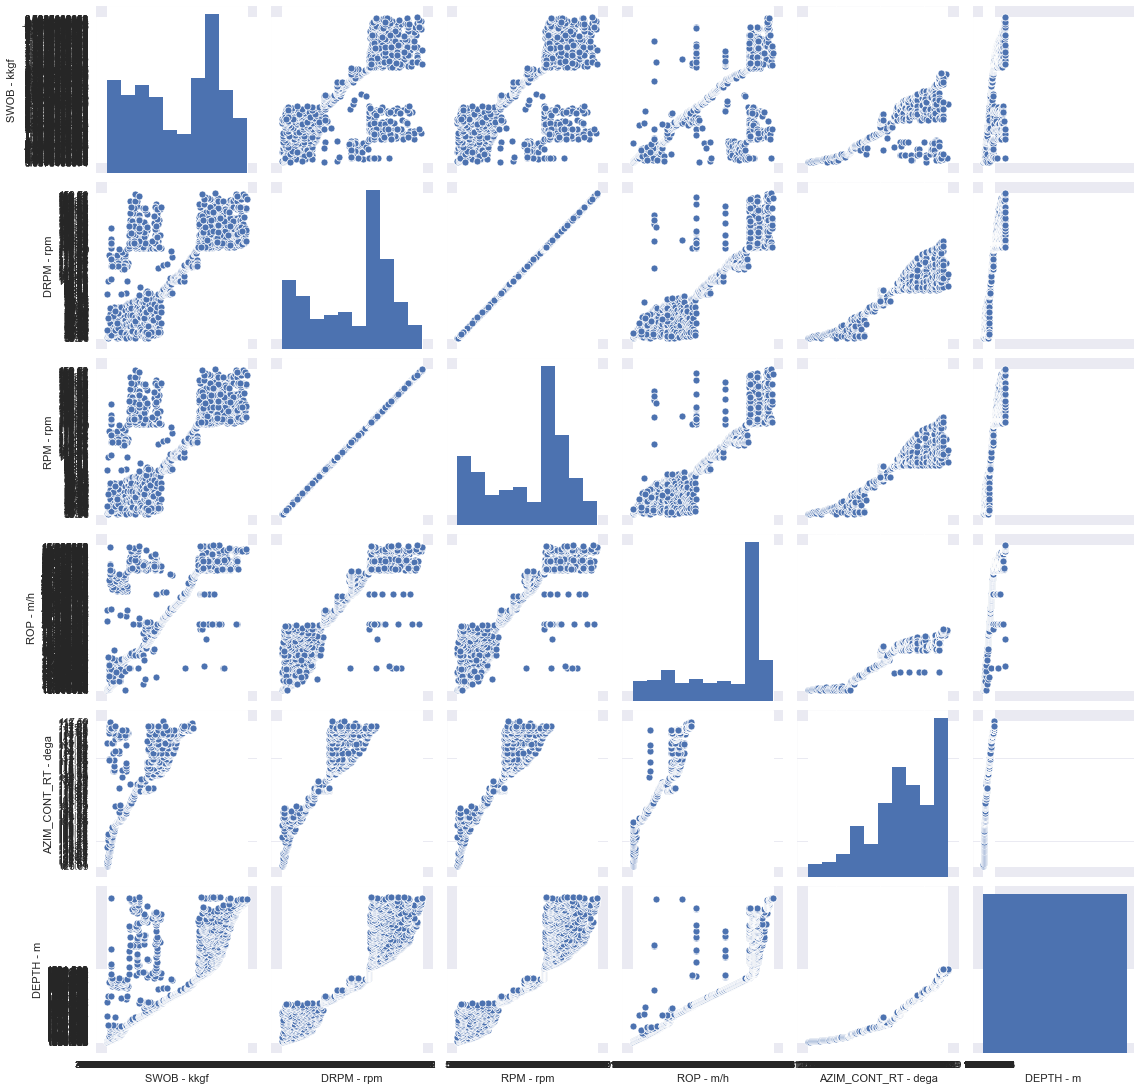

In [25]:
%%time
sns.pairplot(df, vars=['SWOB - kkgf', 'DRPM - rpm','RPM - rpm','ROP - m/h','AZIM_CONT_RT - dega','DEPTH - m'])

Missing data:


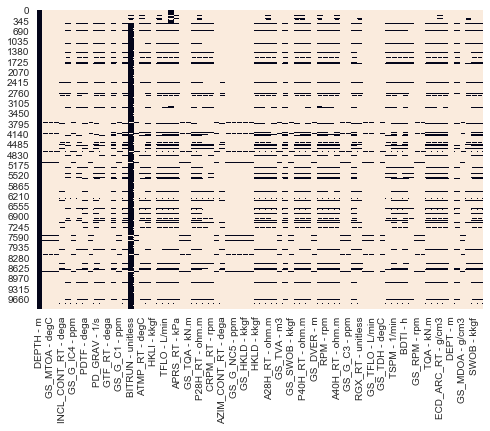

In [49]:
print("Missing data:")
sns.heatmap(df.isnull(), cbar=False)
plt.show()

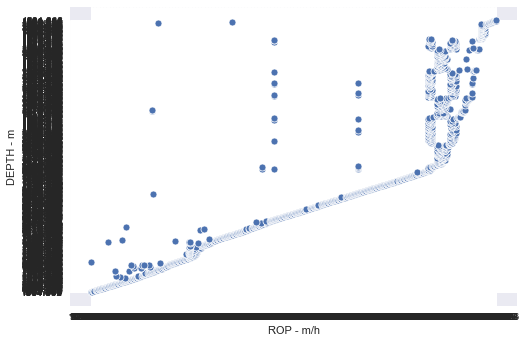

In [33]:
sns.scatterplot(data=df, x='ROP - m/h', y="DEPTH - m")

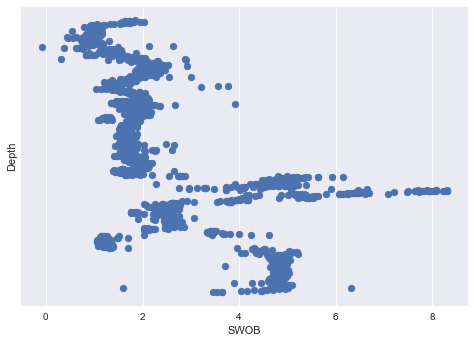

In [47]:
plt.scatter(df['SWOB - kkgf'],df["DEPTH - m"])
plt.ylabel("Depth")
plt.yticks([])
plt.xlabel("SWOB")
plt.show()

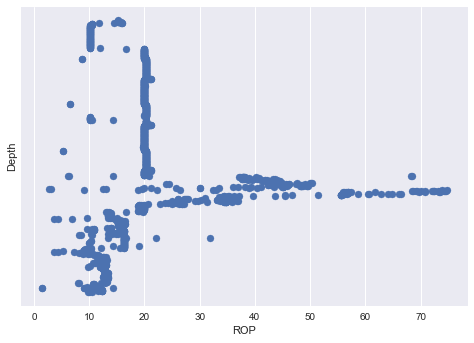

In [50]:
plt.scatter(df["ROP - m/h"],df["DEPTH - m"])
plt.ylabel("Depth")
plt.yticks([])
plt.xlabel("ROP")
plt.show()

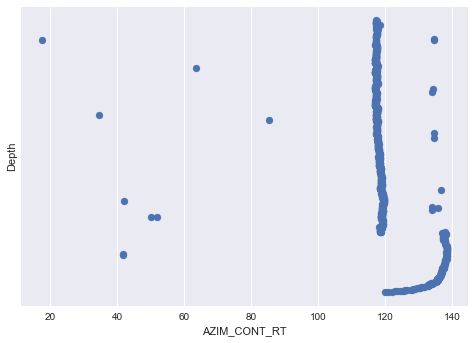

In [52]:
plt.scatter(df['AZIM_CONT_RT - dega'],df["DEPTH - m"])
plt.ylabel("Depth")
plt.yticks([])
plt.xlabel("AZIM_CONT_RT")
plt.show()